In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.filepaths.filepaths import (
    FILE_PATH_CASE_101,
    FILE_PATH_CASE_101_HFM_T,
    FILE_PATH_CASE_101_HFM_T_OBS,
    FILE_PATH_CASE_101_HFM_Z,
    FILE_PATH_DRILLING_REPORT_LABELED_CASE_101
)

from utils.utils.utils import get_active_drilling_data, reading_labeled_drill_report_data, extracting_labeled_data_from_dataframe, plot_sections

sns.set_theme()

In [48]:
# Loading files
sensor_data_case_101 = pd.read_pickle(FILE_PATH_CASE_101)
# Extracting the dates to consider
tstamp_min = '2020-07-23 02:45:00+00:00'
tstamp_max = '2020-07-25 02:30:00+00:00'
sensor_data_case_101 = sensor_data_case_101.loc[tstamp_min:tstamp_max]
# This is done in the demo and should be done here to assure correct overlap
sensor_data_case_101 = sensor_data_case_101.iloc[1:]
hfm_data_case_101_t = pd.read_pickle(FILE_PATH_CASE_101_HFM_T)
hfm_data_case_101_t_obs = pd.read_pickle(FILE_PATH_CASE_101_HFM_T_OBS)
hfm_data_case_101_z = pd.read_pickle(FILE_PATH_CASE_101_HFM_Z)
display(hfm_data_case_101_t.head())
display(sensor_data_case_101.head())

# sensor_data_case_101, hfm_data_case_101_t = get_active_drilling_data(sensor_data_case_101, hfm_data_case_101_t, include_rop_zeros=True)
hfm_data_case_101_t_obs = hfm_data_case_101_t_obs.loc[hfm_data_case_101_t.index]

,Rate_in,SPP,ECD_bot,ECD_shoe,P_choke,FrontFluid2,FrontFluid3,FrontFluid4,FrontFluid5,FrontFluid6,...,mTotMud,mFreeGas,mDGas,qLoss,mLost,XFactor,DSXFactor,DensityIn,DensityOut,incl
TIME,,,,,,,,,,,,,,,,,,,,,
2020-07-23 02:45:10+00:00,0.0,1.0429,1.272,1.272,1.0132,0.0,0.0,0.0,0.0,0.0,...,226860.0,0.0,0.0,0.0,0.0,1.0,1.45,1281.1,1278.0,NaN
2020-07-23 02:45:20+00:00,0.0,1.0408,1.272,1.272,1.0132,0.0,0.0,0.0,0.0,0.0,...,226860.0,0.0,0.0,0.0,0.0,1.0,1.45,1281.1,1278.0,0.000155
2020-07-23 02:45:30+00:00,0.0,1.0408,1.272,1.272,1.0132,0.0,0.0,0.0,0.0,0.0,...,226860.0,0.0,0.0,0.0,0.0,1.0,1.45,1281.1,1278.0,NaN
2020-07-23 02:45:40+00:00,0.0,1.0409,1.272,1.272,1.0132,0.0,0.0,0.0,0.0,0.0,...,226860.0,0.0,0.0,0.0,0.0,1.0,1.45,1281.1,1278.0,0.000131
2020-07-23 02:45:50+00:00,0.0,1.0409,1.272,1.272,1.0132,0.0,0.0,0.0,0.0,0.0,...,226860.0,0.0,0.0,0.0,0.0,1.0,1.45,1281.1,1278.0,0.002664


,ASMDEP1-T,ASMECD1-T,ASMDEP2-T,ASMECD2-T,ASMDEP3-T,ASMDOFF-T,DHT001 Temp PCB Mean,ASMTVD1-T,ASMTVD2-T,ASMTVD3-T,...,RPMPerStand,TqavPerStand,WOBRotPerStand,WOBPerStand,TqavPerStandRot,FlowPerStand,RPMPerStandRot,RDGDTVSS-Relog,AllSlidingRopPerStand,TqavPerStandSl
TIME,,,,,,,,,,,,,,,,,,,,,
2020-07-23 02:45:10+00:00,272.810000,1.332205,-613.861429,1.451468,-1385.245000,-184.820007,16.0,272.789998,0.36,0.45,...,12.32,21316.99,4906.12,4906.12,21316.99,0.04,12.32,80.0,52.33,46742.43
2020-07-23 02:45:20+00:00,272.810000,1.332205,-613.850000,1.451468,-1385.230000,-184.820007,16.0,272.789998,0.36,0.45,...,12.32,21316.99,4906.12,4906.12,21316.99,0.04,12.32,80.0,52.33,46742.43
2020-07-23 02:45:30+00:00,272.823333,1.332205,-613.846667,1.451468,-1385.225000,-184.820007,16.0,272.803324,0.36,0.45,...,12.32,21316.99,4906.12,4906.12,21316.99,0.04,12.32,80.0,52.33,46742.43
2020-07-23 02:45:40+00:00,272.842500,1.332205,-613.825000,1.451468,-1385.206667,-184.820007,16.0,272.822495,0.36,0.45,...,12.32,21316.99,4906.12,4906.12,21316.99,0.04,12.32,80.0,52.33,46742.43
2020-07-23 02:45:50+00:00,272.862500,1.332205,-613.803333,1.451468,-1385.185000,-184.820007,16.0,272.842499,0.36,0.45,...,12.32,21316.99,4906.12,4906.12,21316.99,0.04,12.32,80.0,52.33,46742.43


In [49]:
print(len(sensor_data_case_101), len(hfm_data_case_101_t))
hfm_data_case_101_t.index = sensor_data_case_101.index

17190 17190


In [50]:
hfm_data_case_101_z[0].shape

(14, 17190, 389)

In [51]:
labeled_sections = reading_labeled_drill_report_data(FILE_PATH_DRILLING_REPORT_LABELED_CASE_101)

In [52]:
print(labeled_sections)

[['2020-07-23 12:45:00+00:00' '2020-07-23 16:30:00+00:00' '0']
 ['2020-07-23 16:30:00+00:00' '2020-07-24 00:00:00+00:00' '0']
 ['2020-07-24 00:30:00+00:00' '2020-07-24 01:15:00+00:00' '0']
 ['2020-07-24 01:45:00+00:00' '2020-07-24 04:00:00+00:00' '0']
 ['2020-07-24 04:45:00+00:00' '2020-07-24 06:30:00+00:00' '1']
 ['2020-07-24 07:00:00+00:00' '2020-07-24 12:00:00+00:00' '1']
 ['2020-07-24 12:00:00+00:00' '2020-07-24 15:00:00+00:00' '1']
 ['2020-07-24 15:00:00+00:00' '2020-07-24 16:00:00+00:00' '1']
 ['2020-07-24 16:00:00+00:00' '2020-07-24 18:45:00+00:00' '1']]


In [55]:
dictionary_of_sections = extracting_labeled_data_from_dataframe(df=sensor_data_case_101, labeled_sections=labeled_sections)
dictionary_of_sections_hfm = extracting_labeled_data_from_dataframe(df=hfm_data_case_101_t_obs, labeled_sections=labeled_sections)
dictionary_of_sections_hfm_t = extracting_labeled_data_from_dataframe(df=hfm_data_case_101_t, labeled_sections=labeled_sections)

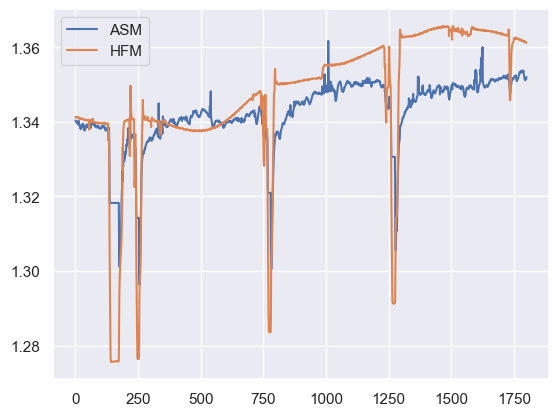

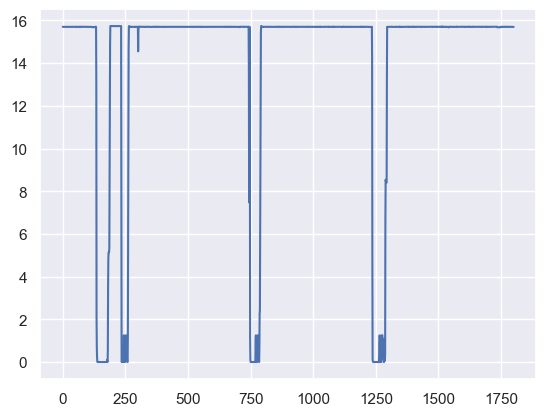

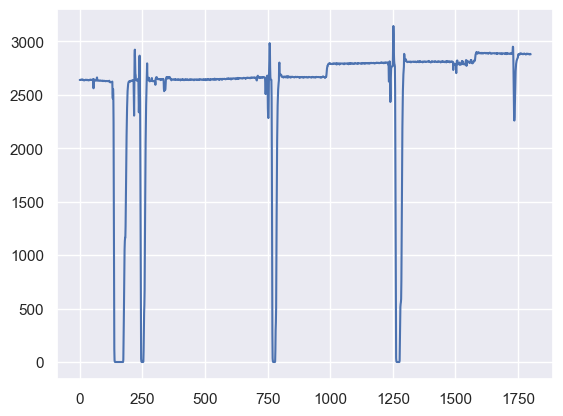

In [56]:
plt.plot(dictionary_of_sections["Section 6"]["ASMECD1-T"].values,label = "ASM")
plt.plot(dictionary_of_sections_hfm["Section 6"]["ecdAtPos1"].values,label = "HFM")
plt.legend()
plt.show()
plt.plot(dictionary_of_sections["Section 6"]["Hookload"].values,label = "ASM")
plt.plot(dictionary_of_sections_hfm["Section 6"]["ecdAtPos1"].values,label = "HFM")
plt.legend()
plt.show()
plt.plot(dictionary_of_sections["Section 6"]["rpmav"].values)
plt.show()
plt.plot(dictionary_of_sections_hfm_t["Section 6"]["ReynAnn"].values)

c:\Users\thomaswi\OneDrive - SINTEF\Drilling and well\Code\CodeForMaster\utils\utils\utils.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.suptitle(f"Dimensionless numbers for annulus Label: {dictionary_of_sections[section]["labels"][0]}")


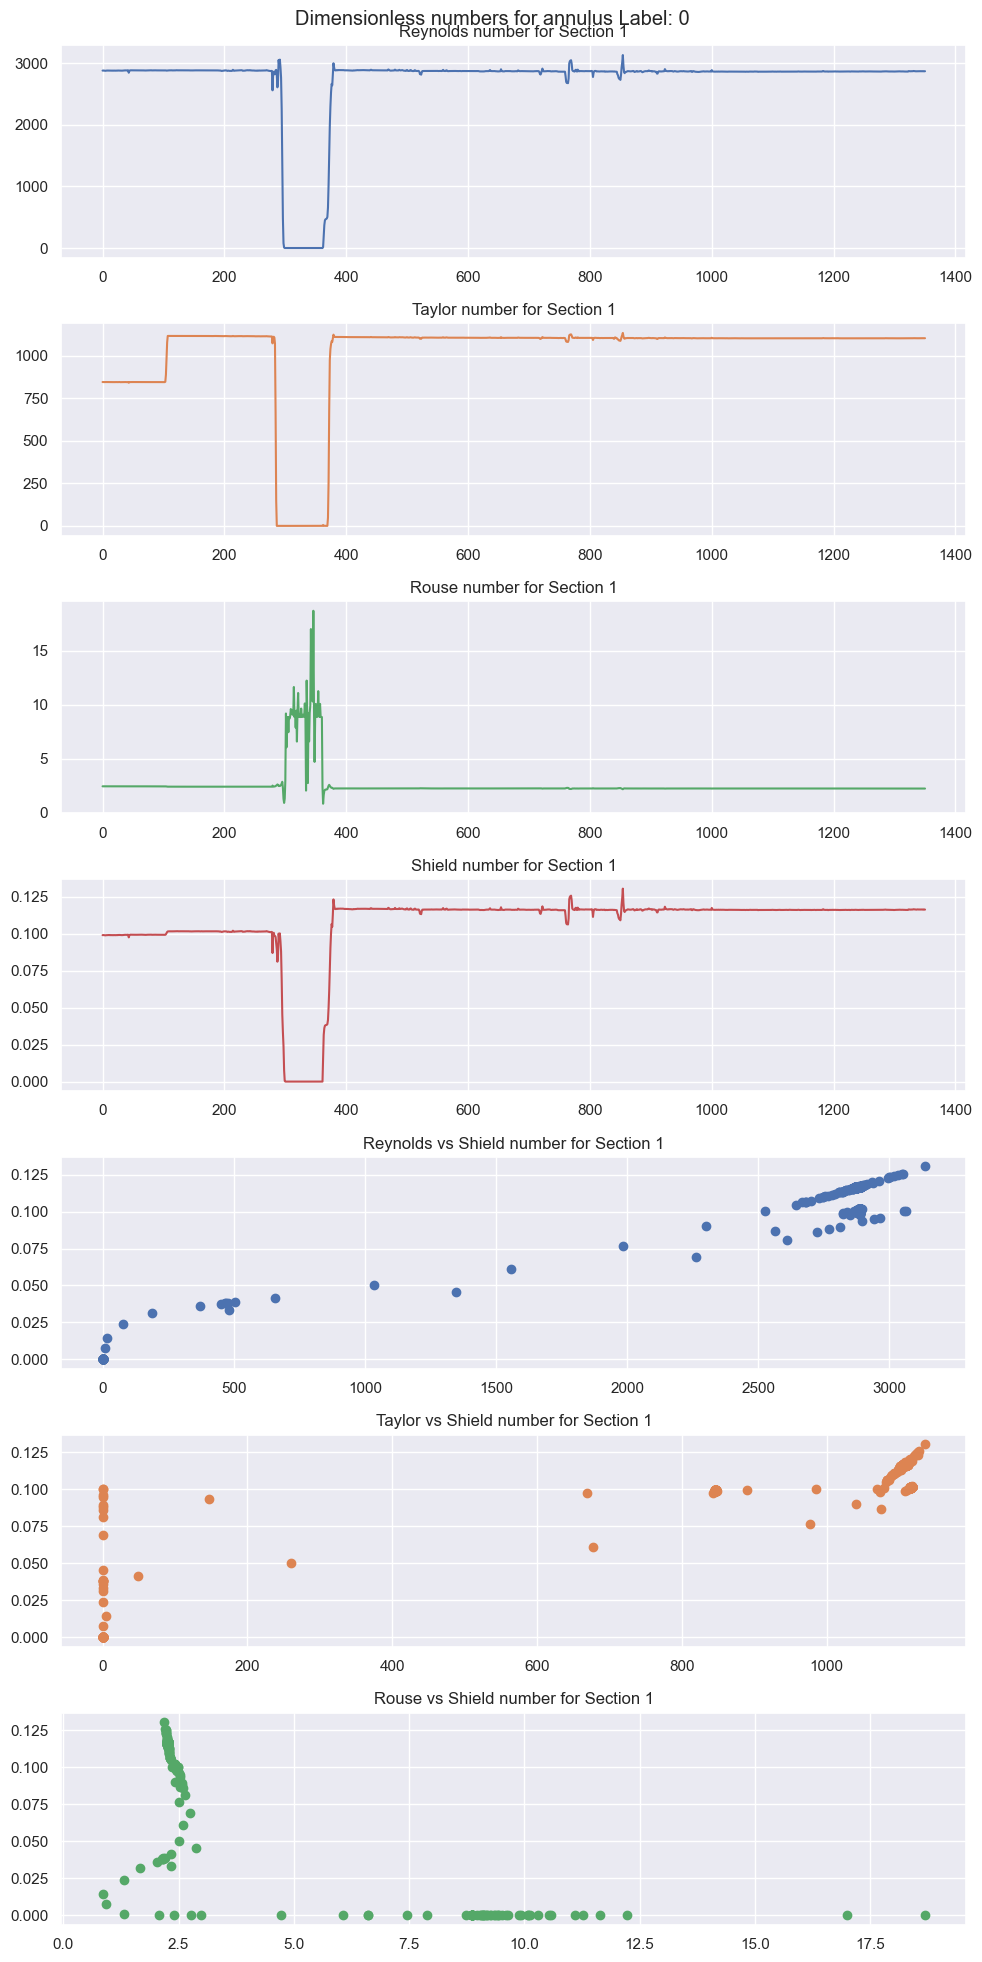

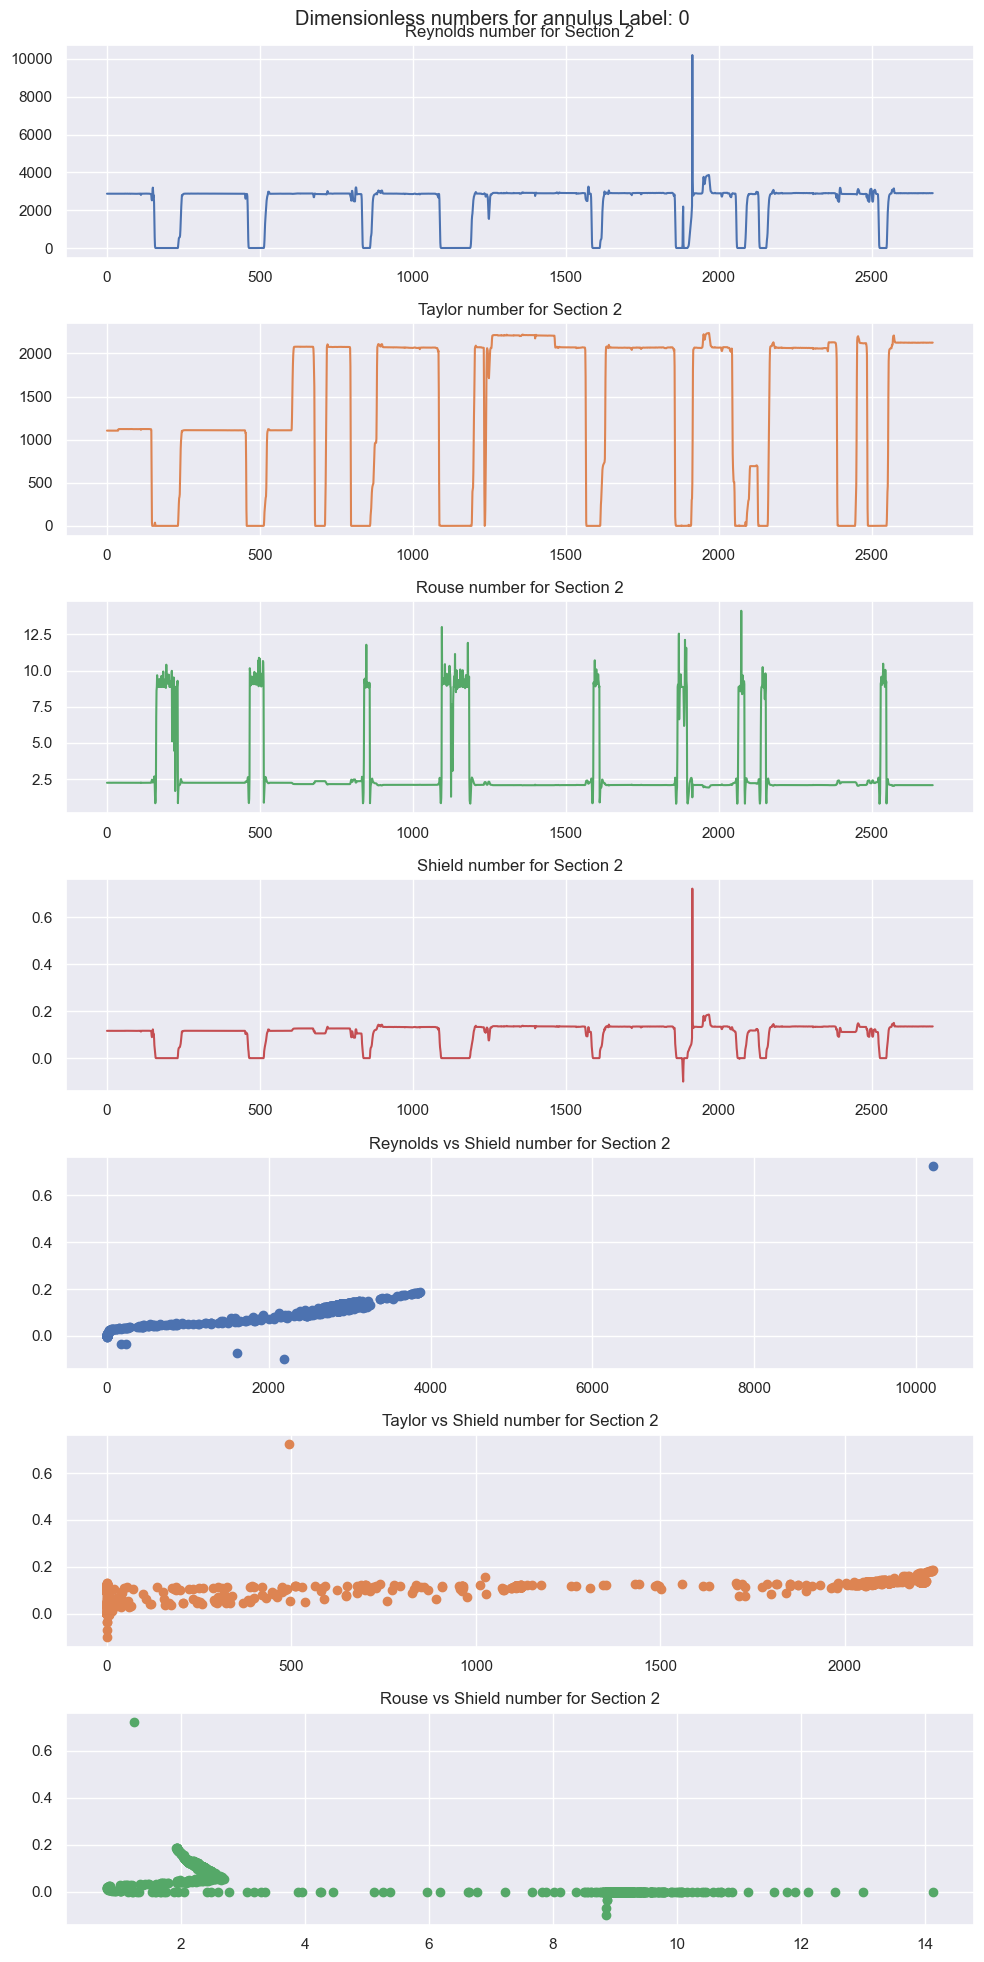

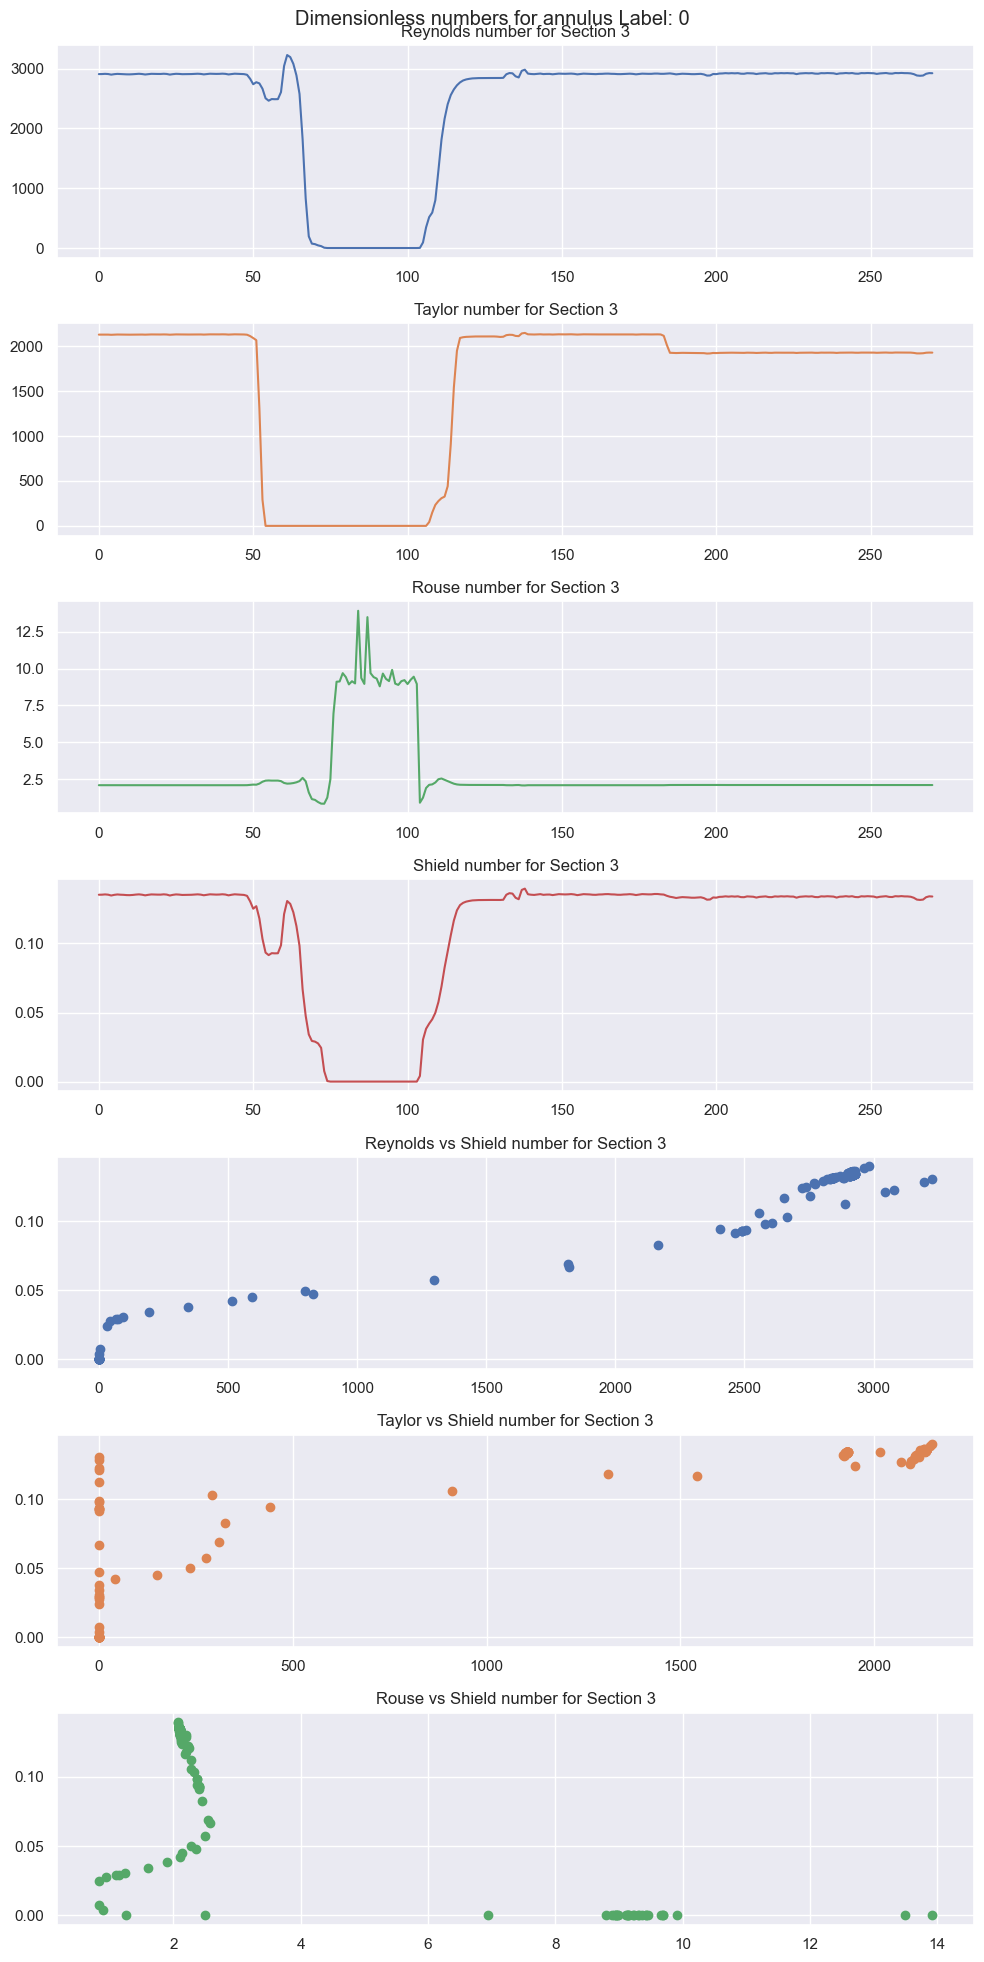

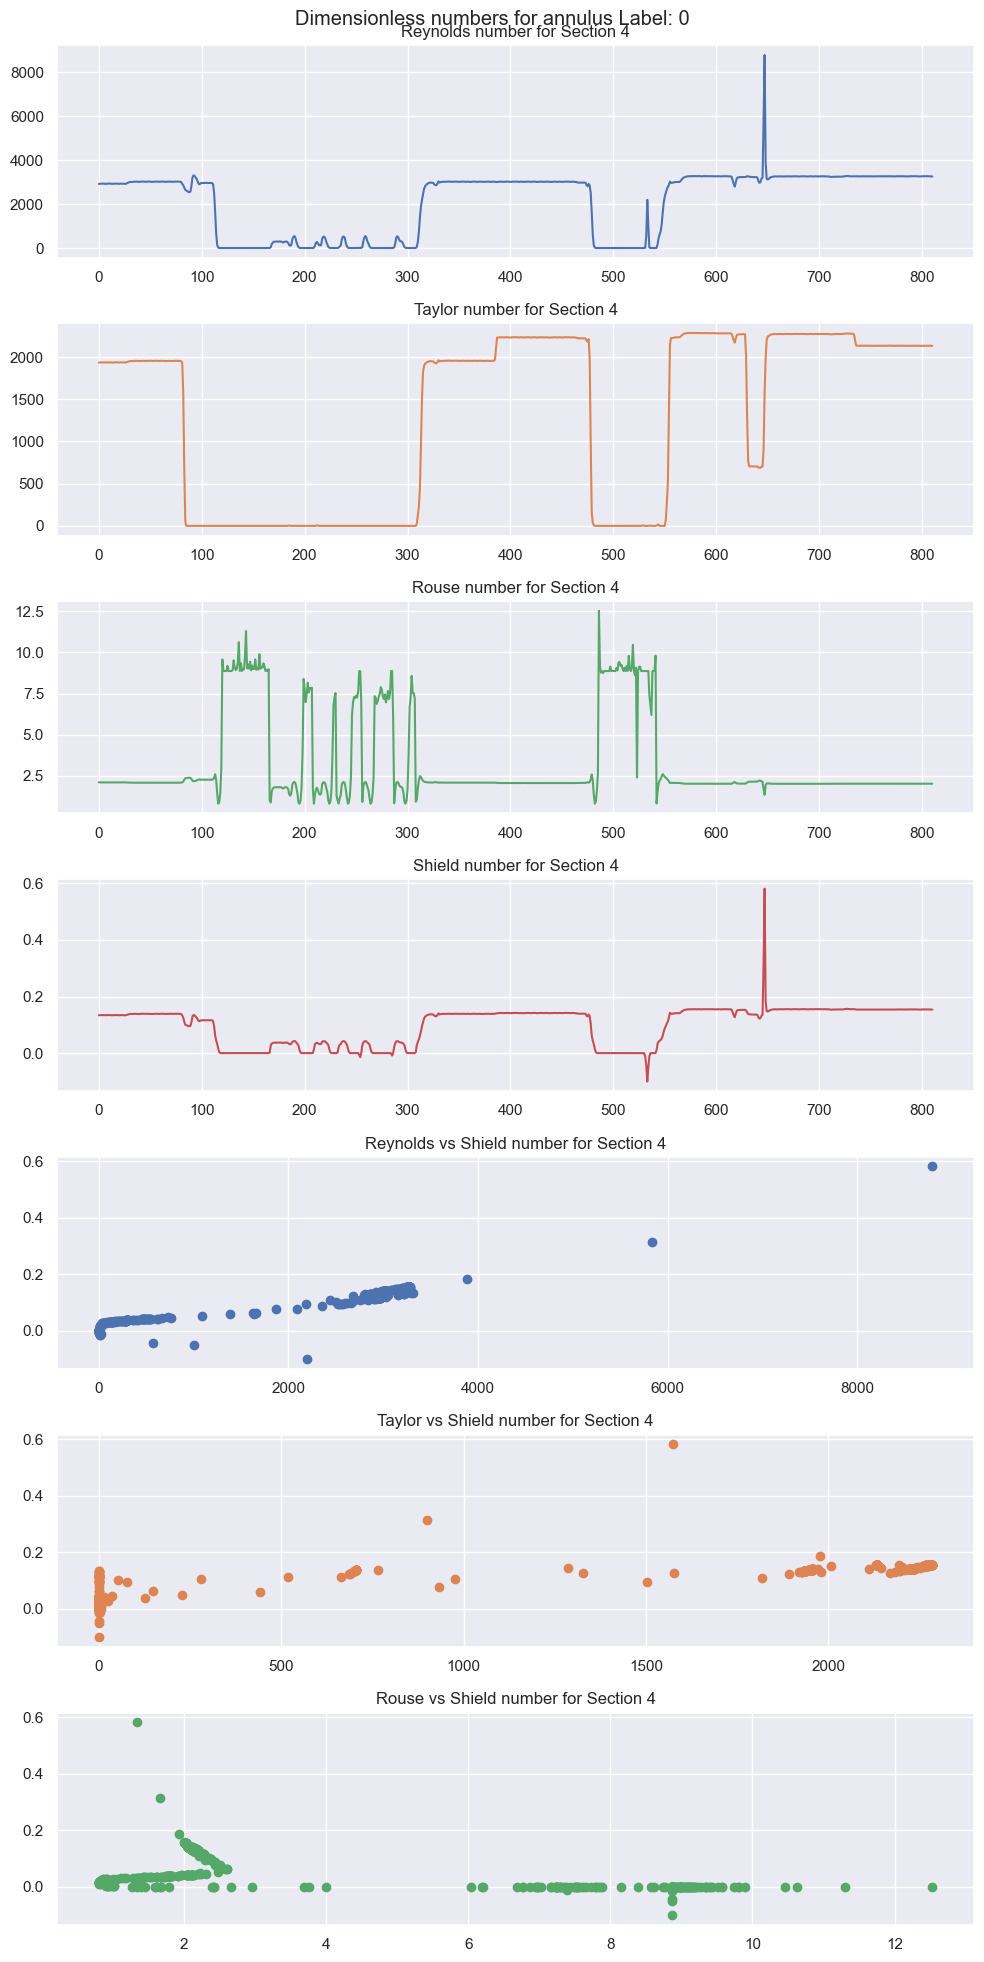

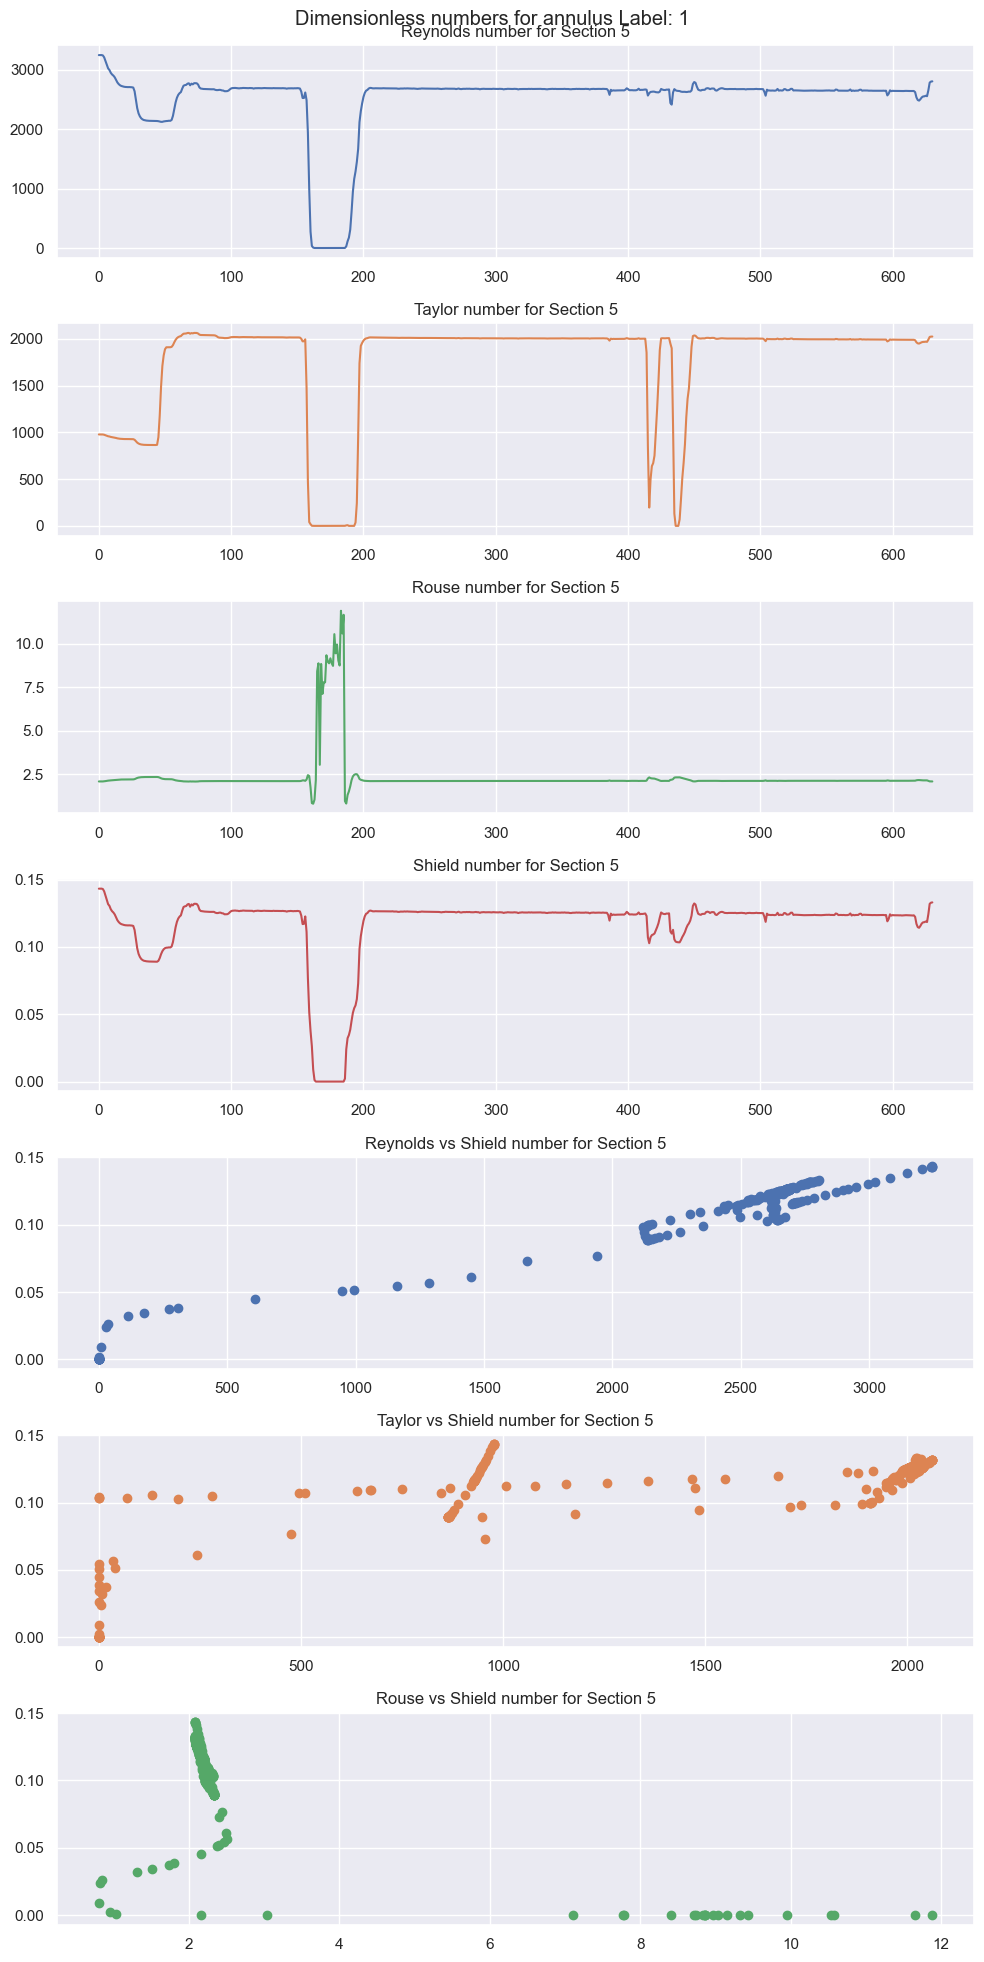

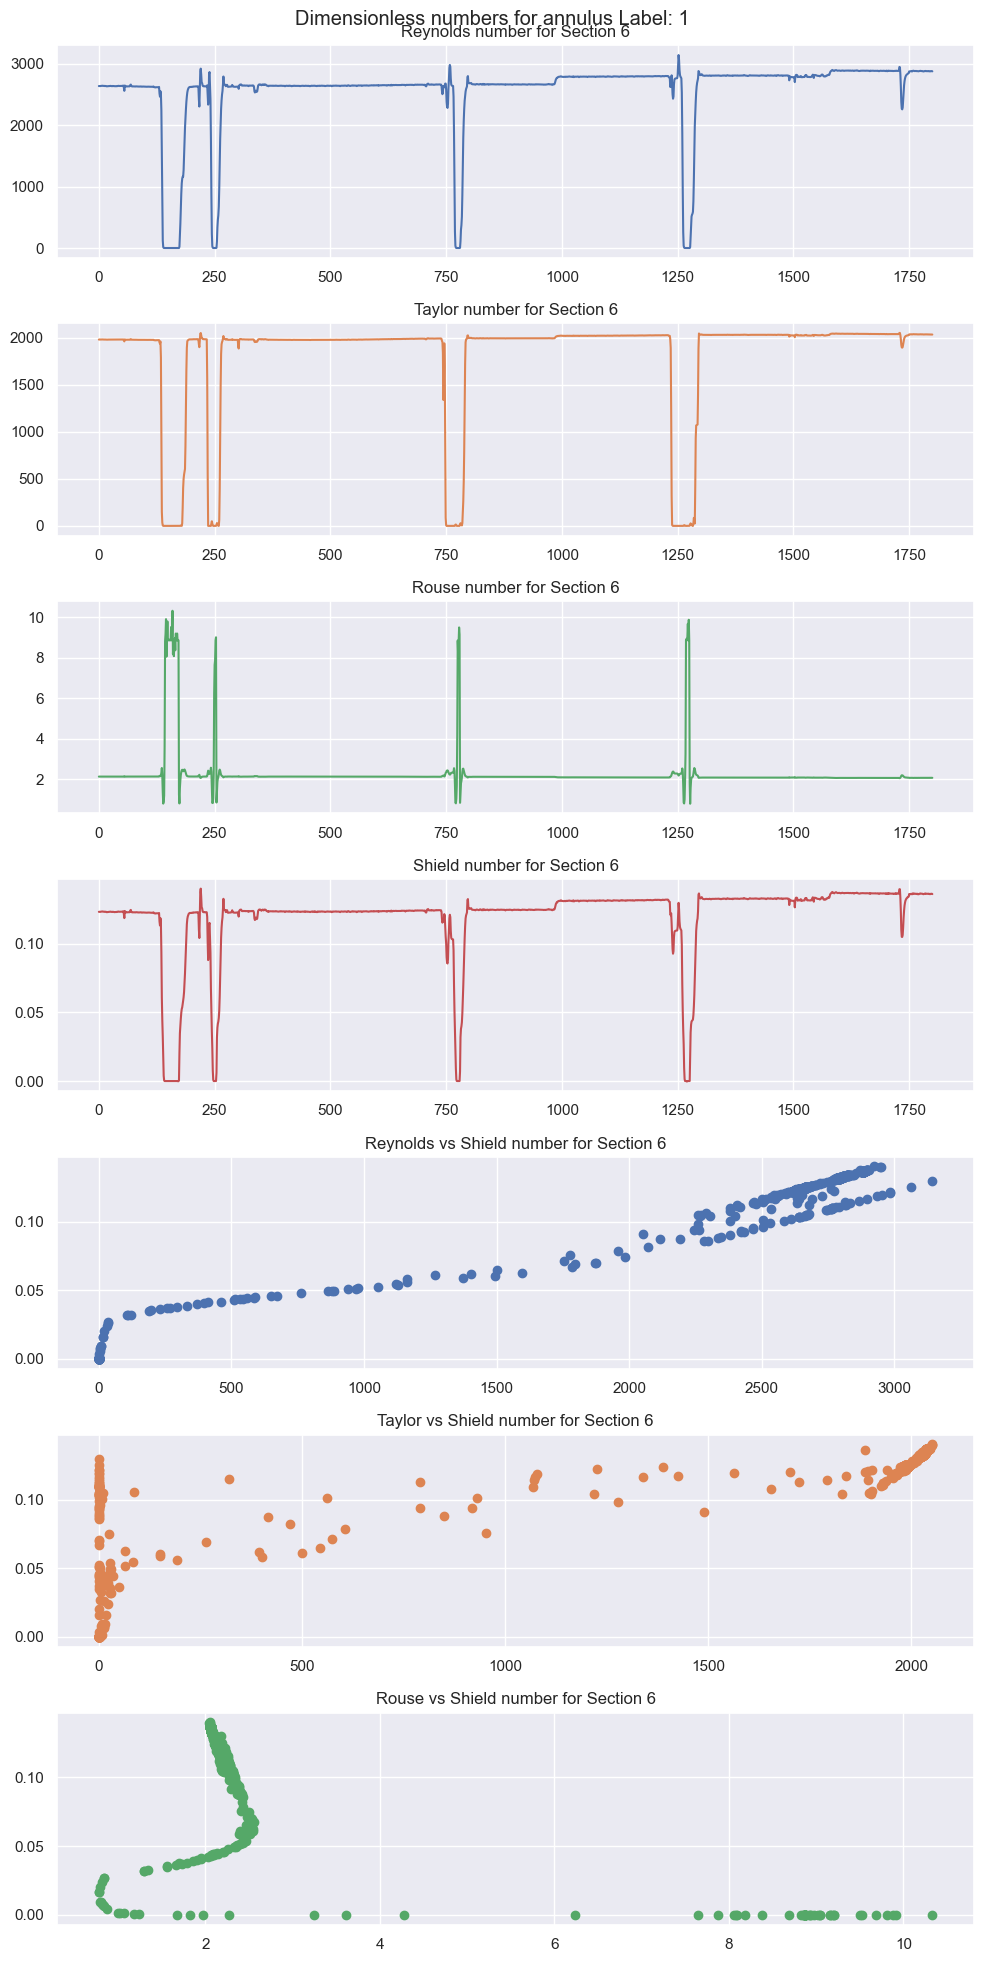

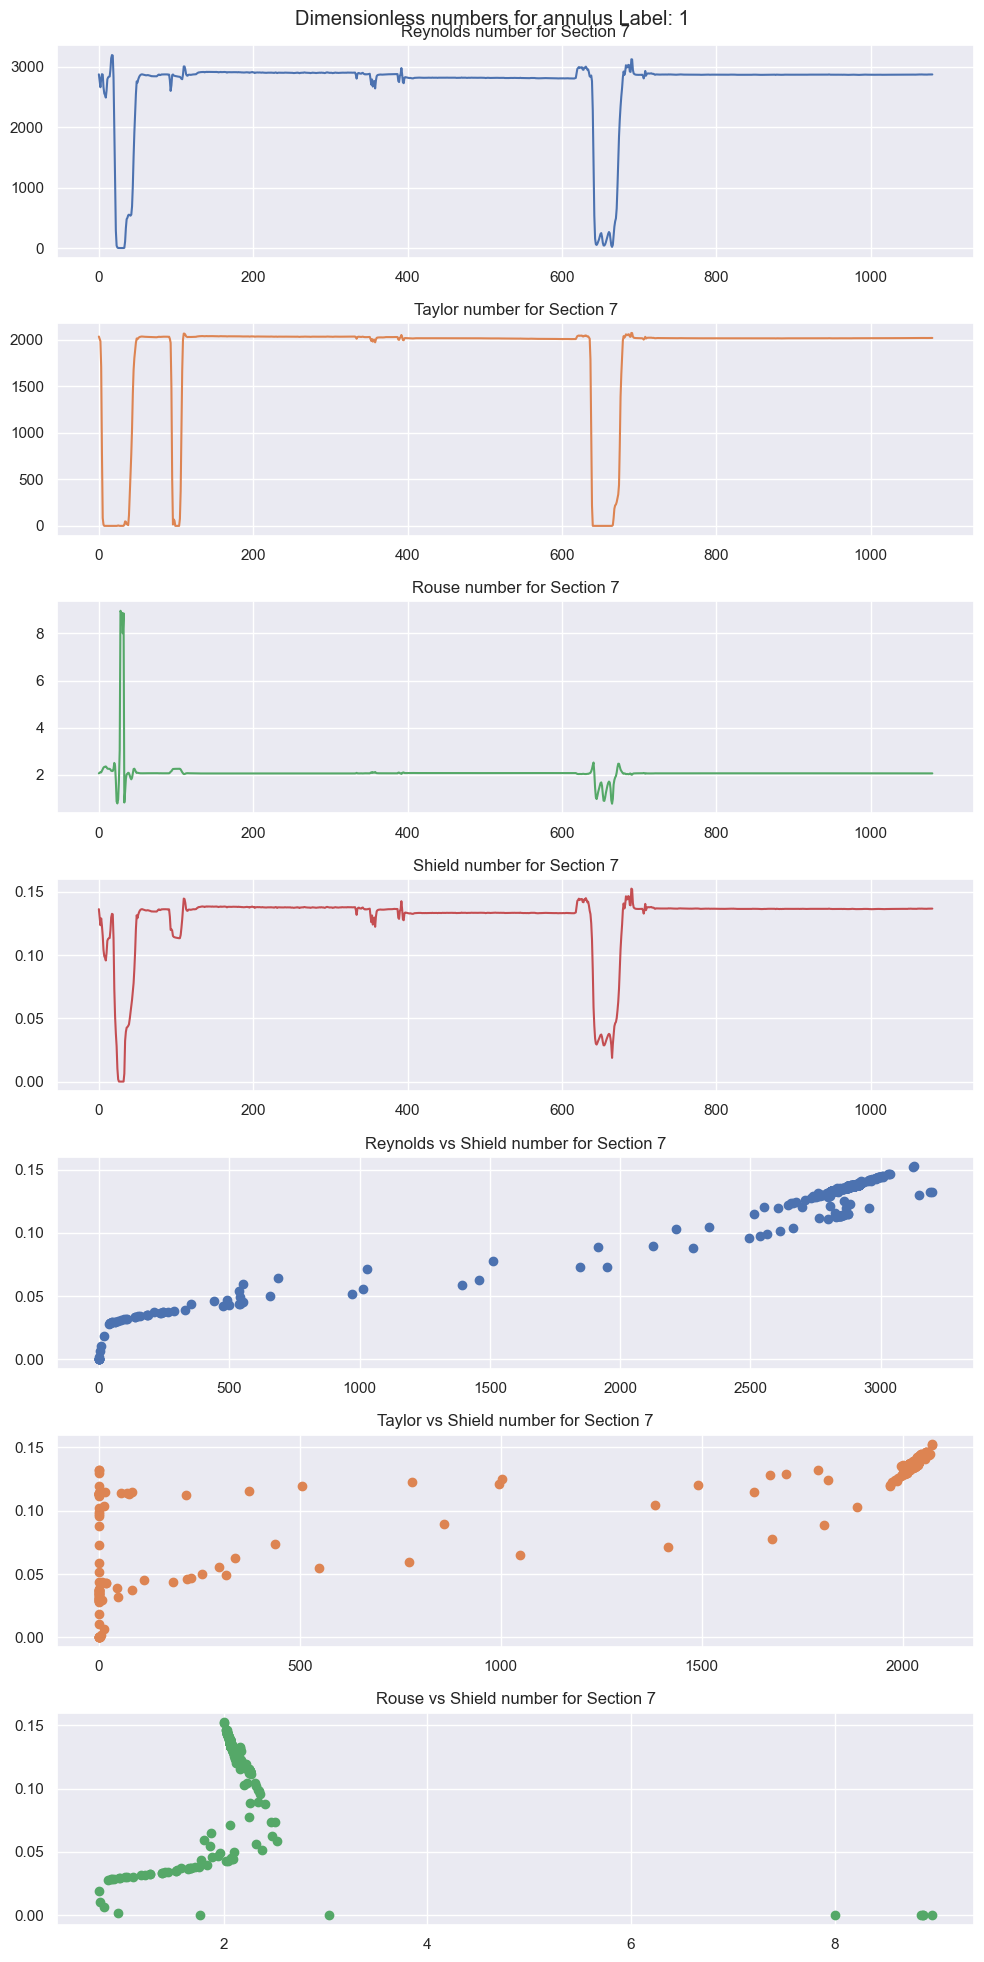

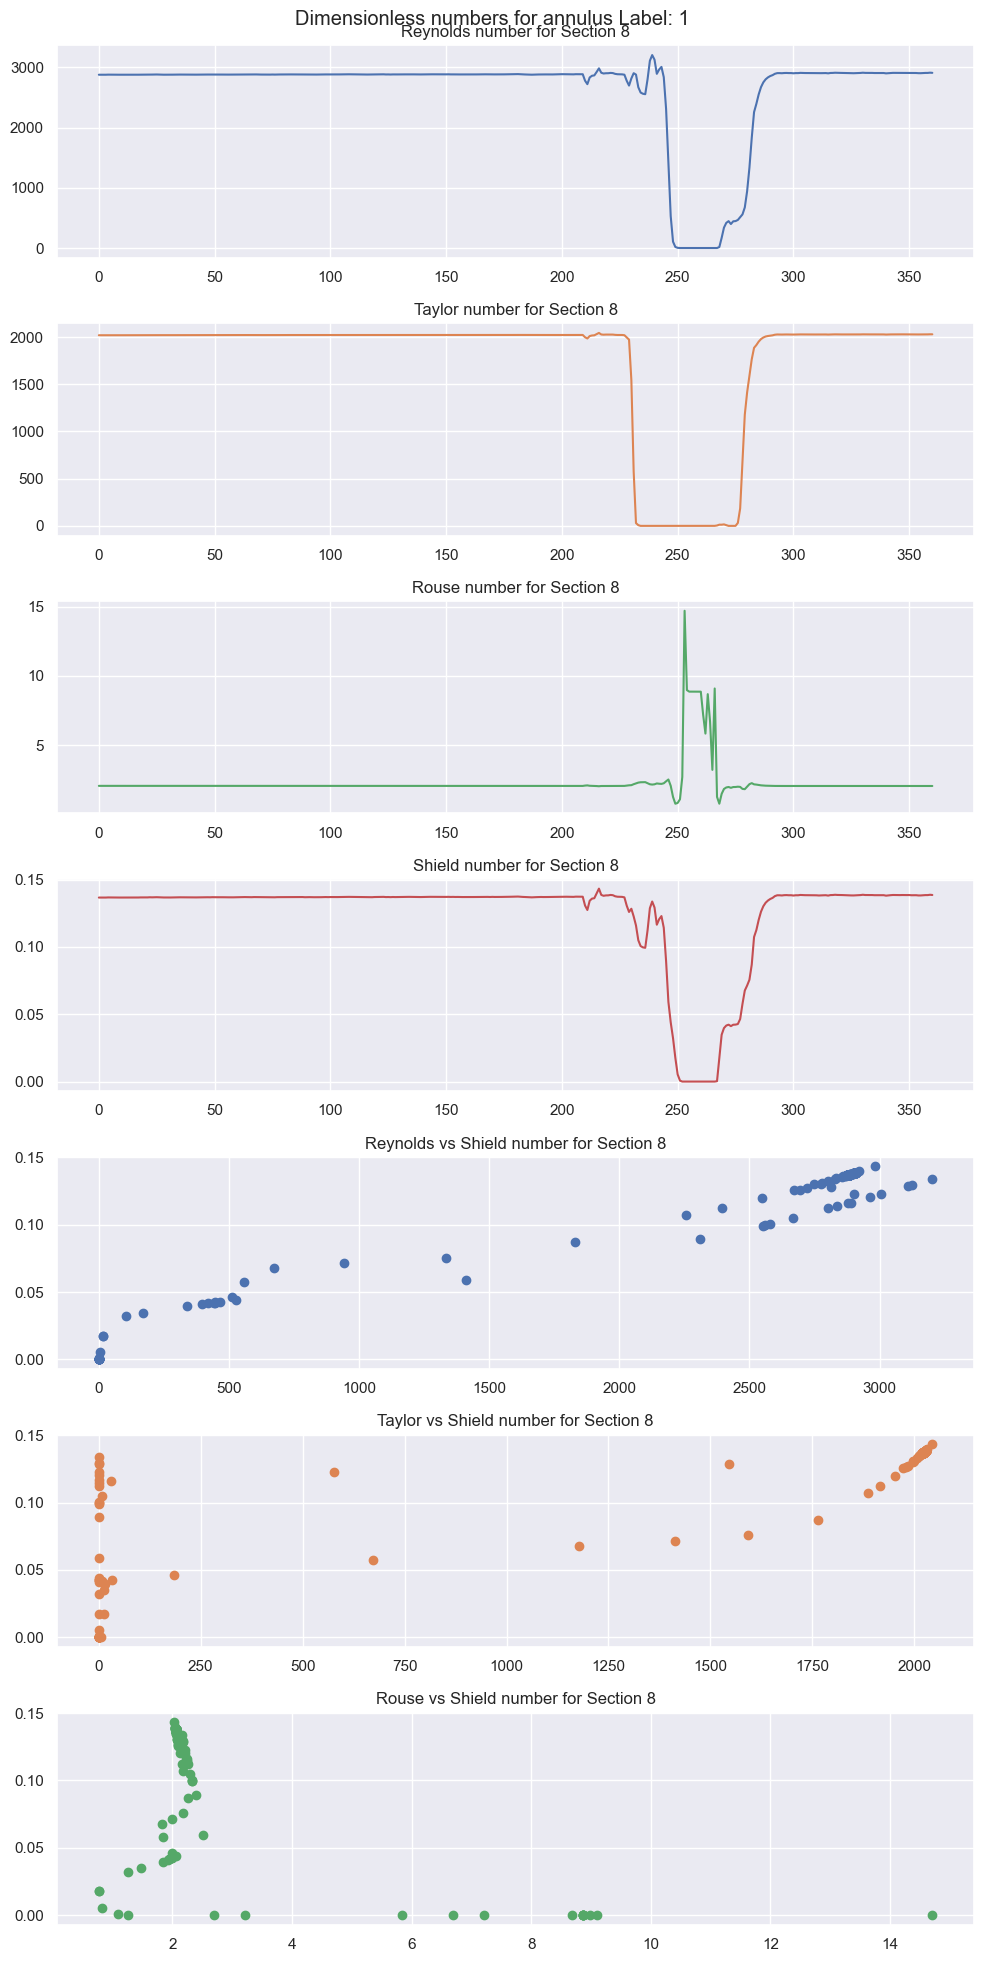

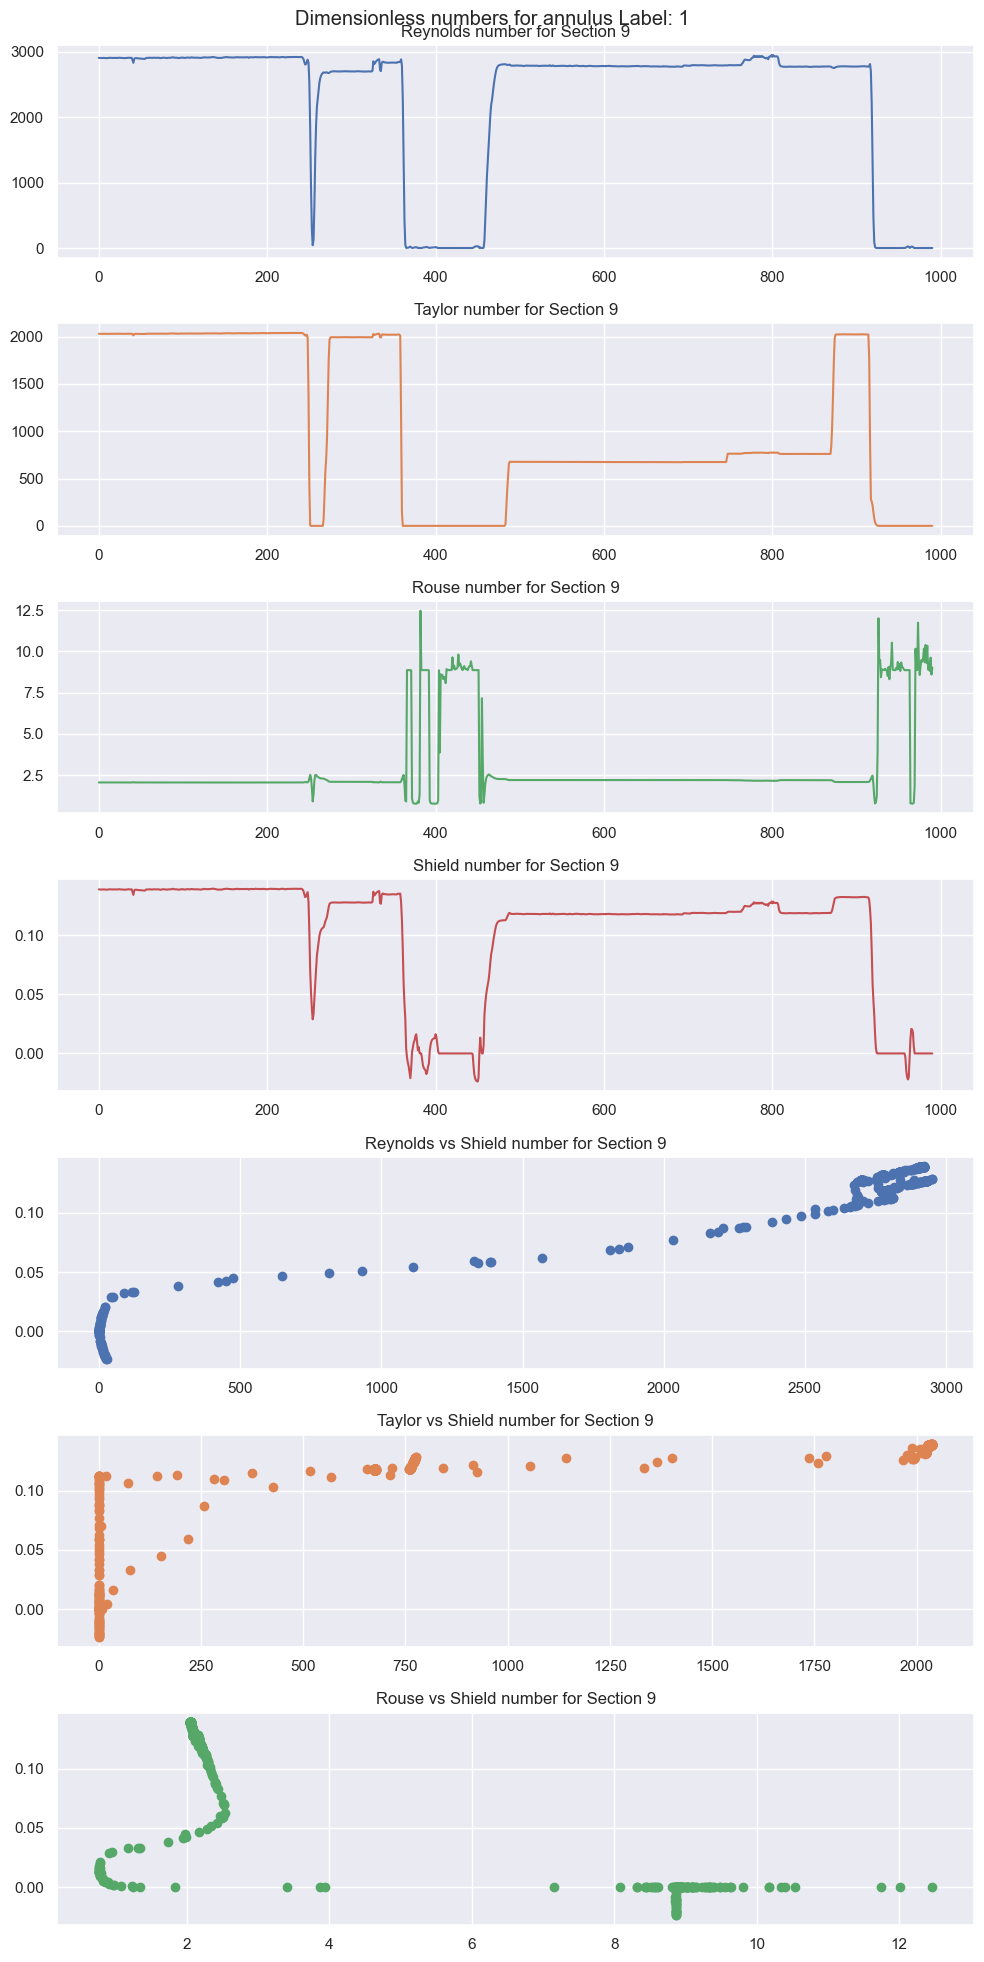

In [57]:
plot_sections(dictionary_of_sections=dictionary_of_sections_hfm_t)